In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
mu = 0  # Mean
sigma = 1  # Standard deviation
num_samples = 10000
data = np.random.normal(mu, sigma, num_samples)

In [70]:
def continuous_power_distribution(x, alpha, beta):
    return ((alpha - 1)/beta)*(x / beta) **(-alpha)

# generate random variables from the power distribution
alpha = 1.5
beta = 0.5
data2 = np.linspace(beta, 4, 1000)

(-4.0, 4.0)

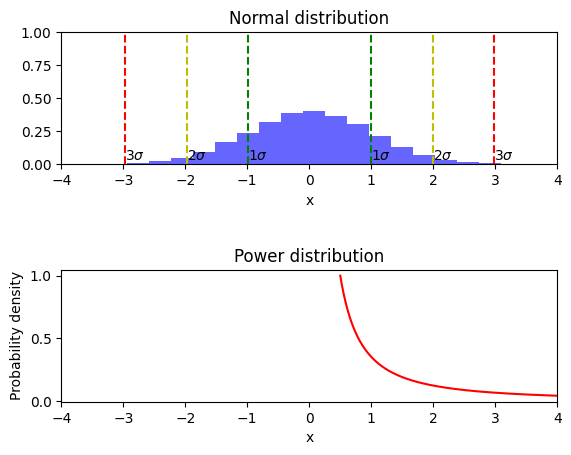

In [71]:
fig, ax = plt.subplots(nrows=2)
ax[0].hist(data, bins=20, density=True, alpha=0.6, color='b', label='Histogram')

mean = np.mean(data)
std_dev = np.std(data)
colors = ['w', 'g', 'y', 'r']

for i in range(1, 4):
    ax[0].axvline(mean + i * std_dev, color=colors[i], linestyle='--', label=f'{i}$\sigma$')
    ax[0].axvline(mean - i * std_dev, color=colors[i], linestyle='--', label=f'{i}$\sigma$')
    # on ticks write the sigma sign
    ax[0].text(mean + i * std_dev, 0.03, f'{i}$\sigma$')
    ax[0].text(mean - i * std_dev, 0.03, f'{i}$\sigma$')
ax[0].set_ylim(0, 1)
ax[0].set_xlim(-4, 4)
ax[0].set_title('Normal distribution')
ax[0].set_xlabel('x')

fig.subplots_adjust(hspace=0.8)

ax[1].plot(data2, continuous_power_distribution(data2, alpha, beta), color='r', label='Power distribution')
ax[1].set_title('Power distribution')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Probability density')
ax[1].set_xlim(-4, 4)

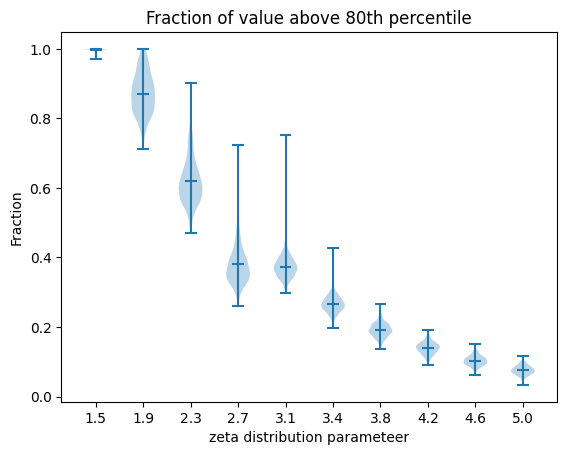

In [107]:
ks = list(np.linspace(1.5, 5, 10))
n = 1000
trials = 1000
pareto = []

for k in ks:
    k_data = []
    for i in range(trials):
        data = np.random.zipf(k, n)
        q = np.quantile(data, 0.8)
        count = sum(data[data > q]) / sum(data)
        k_data.append(count)
    pareto.append(k_data)

# create violin plot
fig, ax = plt.subplots()
ax.violinplot(pareto, positions=range(1, len(ks) + 1), showmeans=True)
ax.set_xticks(range(1, len(ks) + 1))
ax.set_xticklabels(np.round(ks, 1))
ax.set_ylabel('Fraction')
ax.set_title('Fraction of value above 80th percentile')
ax.set_xlabel('zeta distribution parameteer')
plt.show()

